In [1]:
## Basic exploratory analysis 

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("mass_case_description_train_set.csv")

# 1. Shape of the dataset (Number of rows and columns)
print("Dataset Shape:", df.shape)

# 2. Display column names
print("\nColumn Names:", df.columns.tolist())

# 3. Data types of each column
print("\nData Types:")
print(df.dtypes)

# 4. First few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# 5. Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# 6. Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (1318, 14)

Column Names: ['patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']

Data Types:
patient_id                 object
breast_density              int64
left or right breast       object
image view                 object
abnormality id              int64
abnormality type           object
mass shape                 object
mass margins               object
assessment                  int64
pathology                  object
subtlety                    int64
image file path            object
cropped image file path    object
ROI mask file path         object
dtype: object

First 5 Rows:
  patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3       

In [2]:
#Display count of each datatype present in a column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].apply(lambda x: type(x)).value_counts(), "\n")

Column: patient_id
patient_id
<class 'str'>    1318
Name: count, dtype: int64 

Column: breast_density
breast_density
<class 'int'>    1318
Name: count, dtype: int64 

Column: left or right breast
left or right breast
<class 'str'>    1318
Name: count, dtype: int64 

Column: image view
image view
<class 'str'>    1318
Name: count, dtype: int64 

Column: abnormality id
abnormality id
<class 'int'>    1318
Name: count, dtype: int64 

Column: abnormality type
abnormality type
<class 'str'>    1318
Name: count, dtype: int64 

Column: mass shape
mass shape
<class 'str'>      1314
<class 'float'>       4
Name: count, dtype: int64 

Column: mass margins
mass margins
<class 'str'>      1275
<class 'float'>      43
Name: count, dtype: int64 

Column: assessment
assessment
<class 'int'>    1318
Name: count, dtype: int64 

Column: pathology
pathology
<class 'str'>    1318
Name: count, dtype: int64 

Column: subtlety
subtlety
<class 'int'>    1318
Name: count, dtype: int64 

Column: image file pat

In [3]:
#Detect numeric, categorical and mixed Type columns

# Detect purely numeric columns
pure_numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Detect purely categorical columns
pure_categorical_cols = [col for col in df.select_dtypes(include=["object"]).columns 
                         if df[col].map(type).nunique() == 1]

# Detect mixed type columns
mixed_type_cols = [
    col for col in df.columns
    if df[col].dropna().map(type).nunique() > 1
]

# Print detected column types
print("Purely Numeric Columns:", pure_numeric_cols)
print("Purely Categorical Columns:", pure_categorical_cols)
print(f"Mixed Data Type Columns: {mixed_type_cols}")

Purely Numeric Columns: ['breast_density', 'abnormality id', 'assessment', 'subtlety']
Purely Categorical Columns: ['patient_id', 'left or right breast', 'image view', 'abnormality type', 'pathology', 'image file path', 'cropped image file path', 'ROI mask file path']
Mixed Data Type Columns: []


In [4]:
# Identify columns where numbers are stored as strings
numeric_string_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, str) and x.isdigit()).any()]
print("Columns with numeric values stored as strings:", numeric_string_cols)

Columns with numeric values stored as strings: []


In [5]:
# Fill missing values in columns in the dataset
print("Missing Values:\n")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values:

mass margins               43
mass shape                  4
patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64


In [6]:
#Replace missing values in categorical column mass margins and replace with most frequent value "CIRCUMSCRIBED"
mode_value = df["mass margins"].mode()[0]  # Get the most common value
df["calc type"] = df["mass margins"].fillna(mode_value)

# Print mode value and updated column
print(f"The most frequent value used for replacement: {mode_value}")
print("\nUpdated 'mass margins' column:")
print(df["mass margins"])

The most frequent value used for replacement: CIRCUMSCRIBED

Updated 'mass margins' column:
0          SPICULATED
1          SPICULATED
2         ILL_DEFINED
3         ILL_DEFINED
4       CIRCUMSCRIBED
            ...      
1313      ILL_DEFINED
1314       SPICULATED
1315       SPICULATED
1316       SPICULATED
1317       SPICULATED
Name: mass margins, Length: 1318, dtype: object


In [7]:
#Replace missing values in categorical columns "mass shape"
mode_value = df["mass shape"].mode()[0]  # Get the most common value
df["calc distribution"] = df["mass shape"].fillna(mode_value)

# Print mode value and updated column
print(f"The most frequent value used for replacement: {mode_value}")
print("\nUpdated 'mass shape' column:")
print(df["mass shape"])

The most frequent value used for replacement: IRREGULAR

Updated 'mass shape' column:
0       IRREGULAR-ARCHITECTURAL_DISTORTION
1       IRREGULAR-ARCHITECTURAL_DISTORTION
2                 ARCHITECTURAL_DISTORTION
3                 ARCHITECTURAL_DISTORTION
4                                     OVAL
                       ...                
1313                             IRREGULAR
1314                                 ROUND
1315                                 ROUND
1316                             IRREGULAR
1317                             IRREGULAR
Name: mass shape, Length: 1318, dtype: object


In [8]:
#Convert "mass shape' column to string. It contains both string and float type
df['mass shape'] = df['mass shape'].astype(str)
print(df['mass shape'].apply(type).unique())  # Check unique data types

[<class 'str'>]


In [9]:
#Check for other columns that may contain mixed datatypes

# Step 1: Identify columns that were initially mixed-type
mixed_columns = [col for col in df.columns if df[col].apply(lambda x: type(x)).nunique() > 1]

# Step 2: Check if conversion was successful (i.e., each column now has only one data type)
converted_columns = [col for col in mixed_columns if df[col].apply(lambda x: type(x)).nunique() == 1]

# Step 3: Display results
if set(mixed_columns) == set(converted_columns):
    print("✅ All mixed-type columns have been successfully converted!")
else:
    print("⚠️ Some columns still have mixed data types:")
    remaining_mixed = set(mixed_columns) - set(converted_columns)
    print("Columns that still need fixing:", list(remaining_mixed))

⚠️ Some columns still have mixed data types:
Columns that still need fixing: ['mass margins']


In [10]:
#Convert "mass margins' column to string. It contains both string and float type
df['mass shape'] = df['mass margins'].astype(str)
print(df['mass shape'].apply(type).unique())  # Check unique data types

[<class 'str'>]


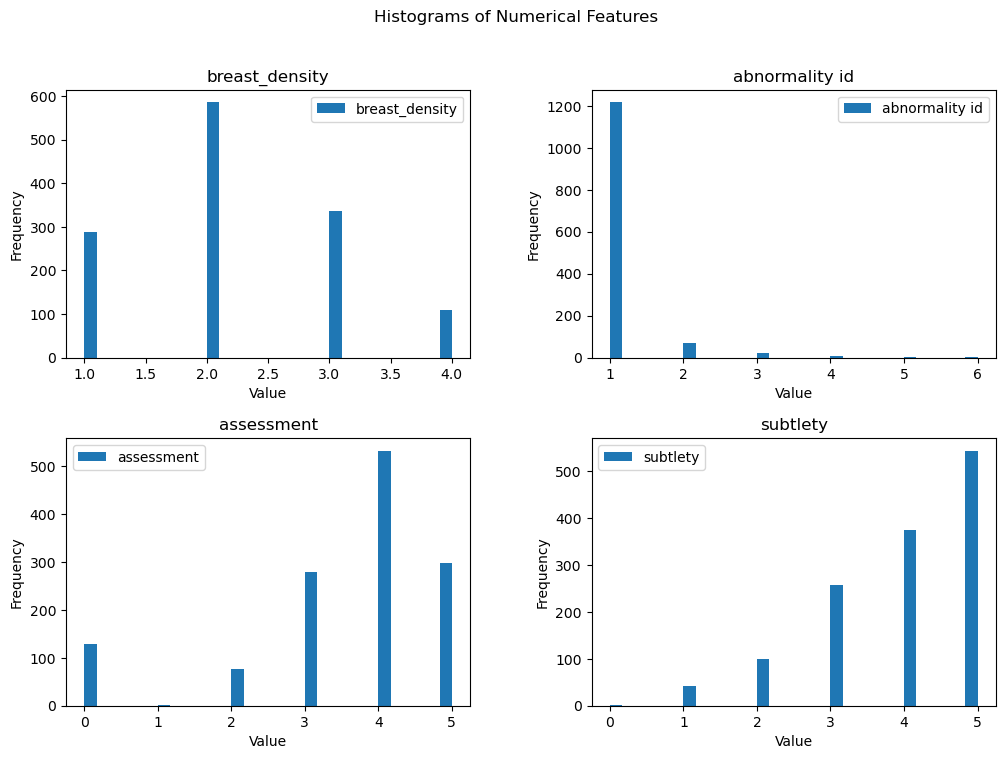

In [11]:
# Plot histogram for all numerical features

import matplotlib.pyplot as plt

# Plot histogram for numerical features
axes = df.hist(figsize=(12, 8), bins=30, grid=False)

# Add title
plt.suptitle("Histograms of Numerical Features")

# Check if `axes` is an array (multiple plots) or a single `Axes` object
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Now it works only if axes is an array
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.legend([ax.get_title()])
else:
    axes.set_xlabel("Value")
    axes.set_ylabel("Frequency")
    axes.legend([axes.get_title()])

# Show the plot
plt.show()

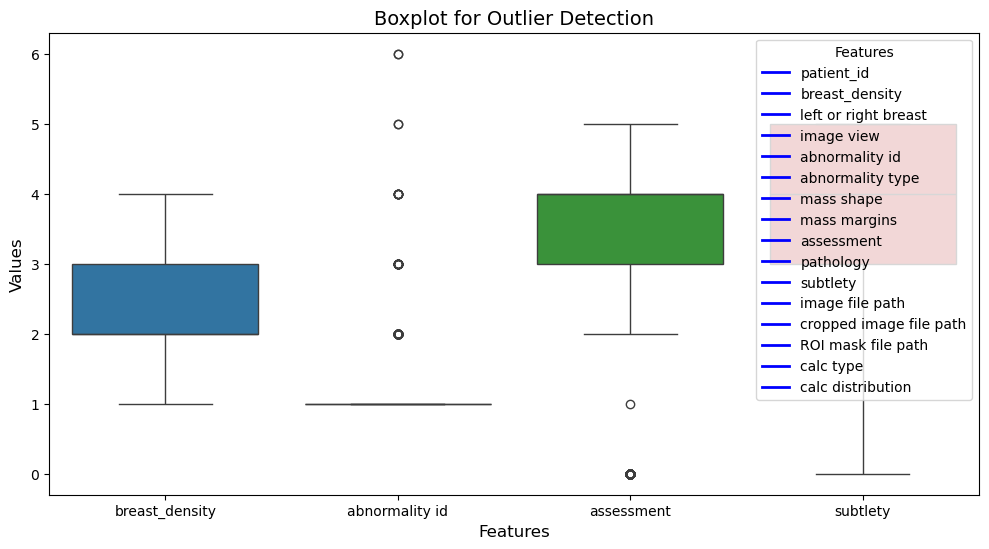

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust figure size
ax = sns.boxplot(data=df)

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Generate legend dynamically based on column names
handles = [plt.Line2D([0], [0], color="blue", lw=2, label=col) for col in df.columns]
plt.legend(handles=handles, title="Features", loc="upper right")

# Show the plot
plt.show()

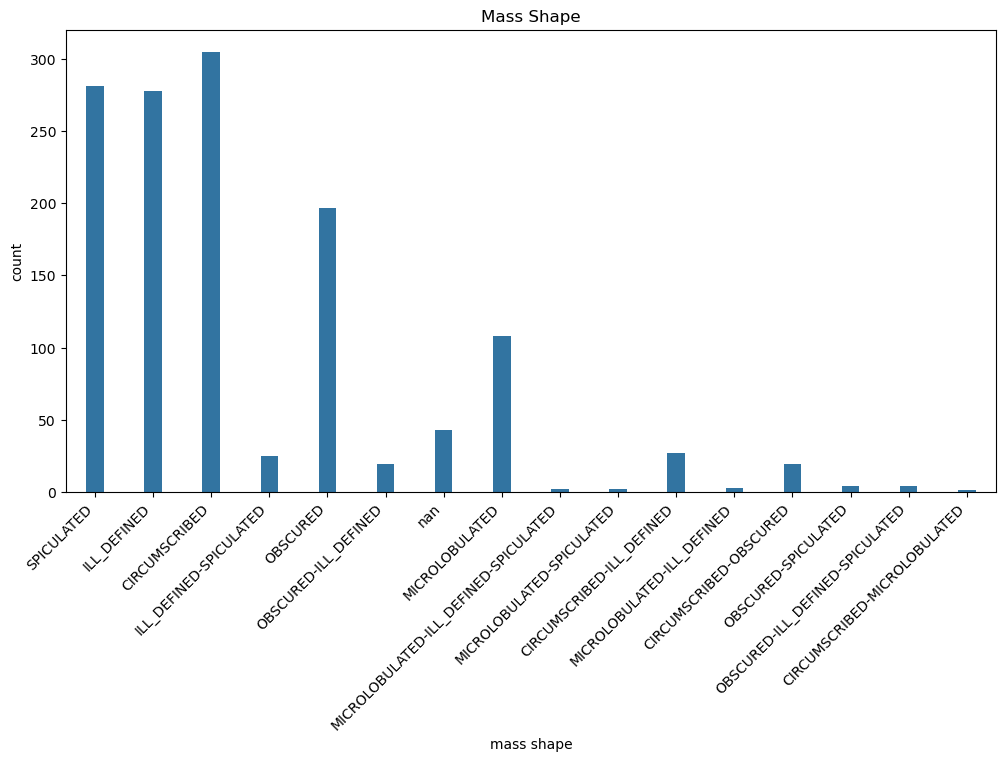

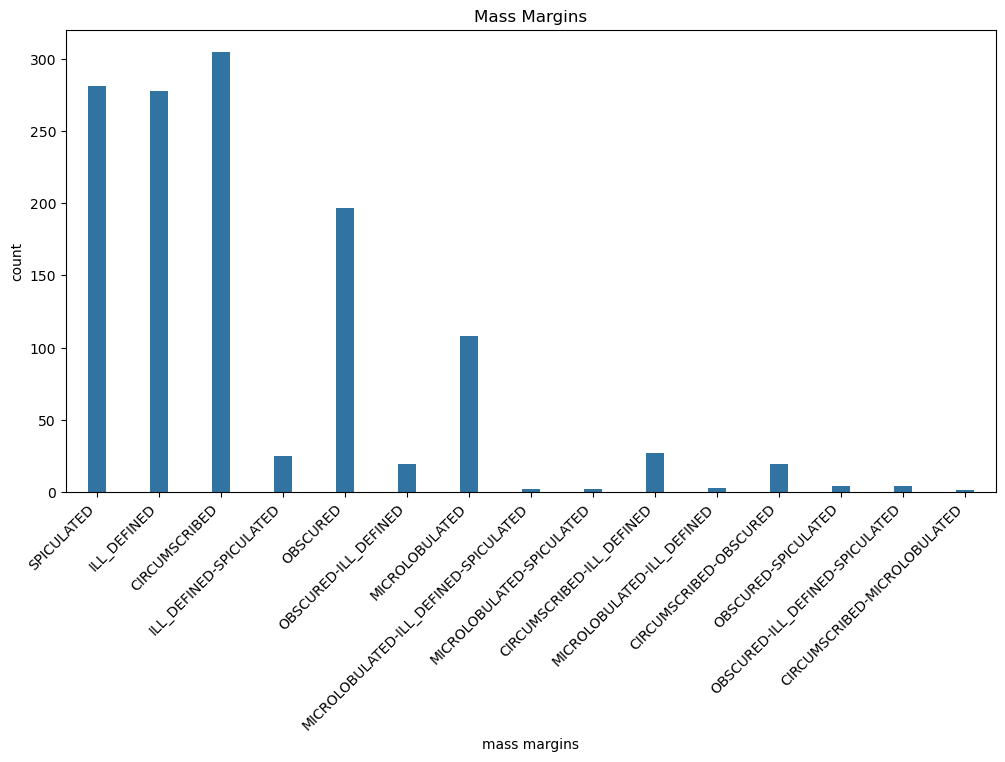

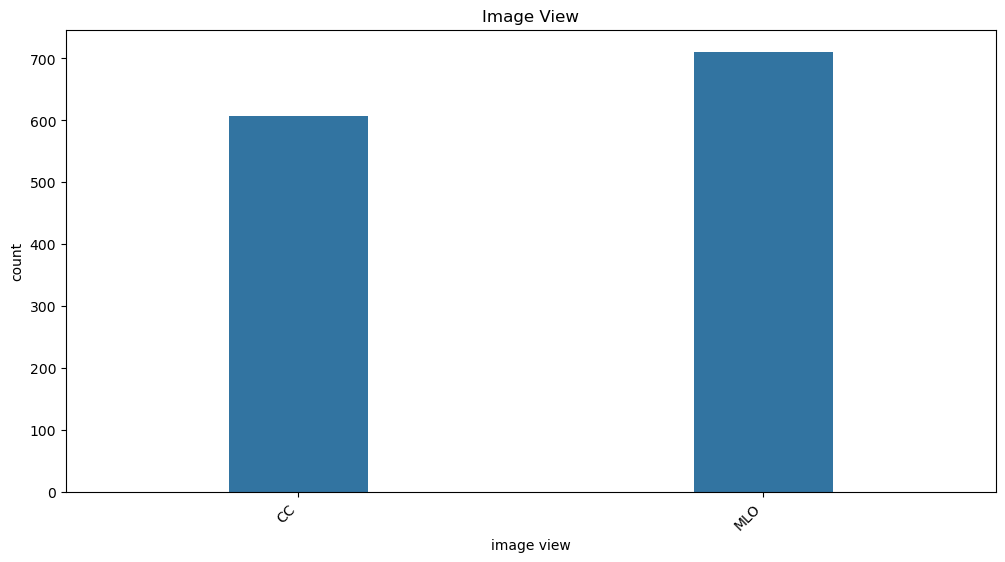

In [13]:
#Plot count plots for categorical variables to count occurences of unique category in a column 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='mass shape', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Mass Shape")
plt.show()

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='mass margins', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Mass Margins")
plt.show()

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='image view', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Image View")
plt.show()

pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64
pathology
MALIGNANT                  48.330804
BENIGN                     43.778452
BENIGN_WITHOUT_CALLBACK     7.890744
Name: proportion, dtype: float64


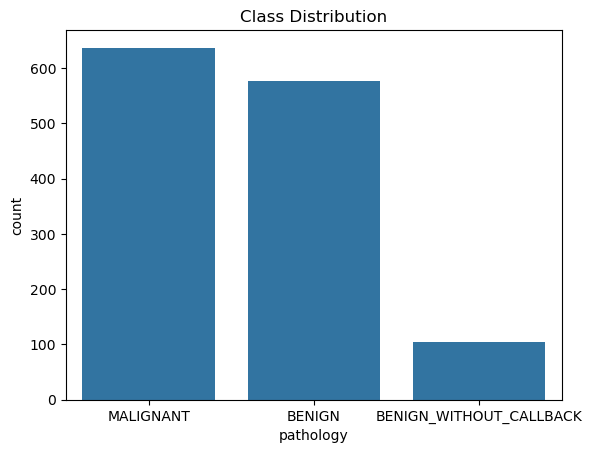

In [14]:
# Checking for imbalanced data for Classification Class 
print(df["pathology"].value_counts())  # Counts occurrences of each class
print(df["pathology"].value_counts(normalize=True) * 100)  # Show percentage distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["pathology"])
plt.title("Class Distribution")
plt.show()

In [15]:
# Spearman coorelation matrix to detect correlation amongst numeric features 
import pandas as pd
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute Spearman correlation matrix
spearman_corr = numeric_df.corr(method="spearman")

# Display correlation values
print("Spearman Correlation Matrix:\n")
print(spearman_corr)

Spearman Correlation Matrix:

                breast_density  abnormality id  assessment  subtlety
breast_density        1.000000       -0.143730    0.027958 -0.310781
abnormality id       -0.143730        1.000000   -0.078711  0.078434
assessment            0.027958       -0.078711    1.000000  0.166847
subtlety             -0.310781        0.078434    0.166847  1.000000


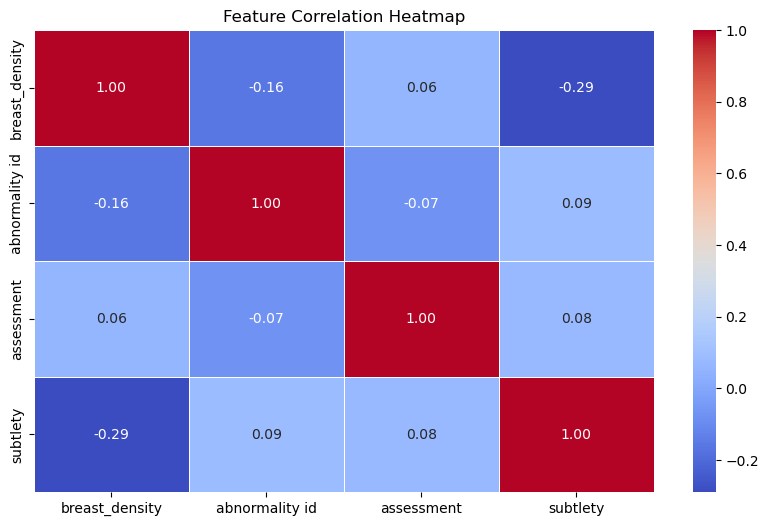

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the column causing conversion issues
df = df.drop(columns=["patient_id"], errors="ignore")  # `errors="ignore"` prevents errors if the column doesn't exist

# Compute correlation matrix (only for numeric columns)
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

In [17]:
#EDA Analysis and Findings: 

#The dataset consists of 1,318 rows and 14 columns. It includes a mix of 10 categorical (object) and 4 numerical columns (int64)

#The "mass shape" and "mass margins" columns contain both strings and floats, are treated as categorical variables. To ensure consistency
#, they are converted entirely to string

#Abnormality ID and Assesment are treated as an integer but are categorical. So, convert them into a category like a text or string during pre-processing 

#Histogram:
#breast density: Looking at histogram, it is clear that it is a categorical data. There are 4 categories, with most representation in categories 3 and 2
#abnormality id: It is also a category. Lower numbers are more common than the higher numbers. So, more common conditions are in category 1 
#assesment: Most of the values fall in category 4. There is no assesment in category 1
#subtlety: Most of the data is between 3 and 5

#Box Plot:
#Abnormality ID: Even though the plot highlights outliers in this variable, they are not true outliers as abnormality id is a category and
#, not a continous variable. Most of the data points are in 1, so only a few are outside it 
#assesment: very large majority of points are between 4 and 3, with a very small number in 0 and 1. There is no representation of 2 category  
#subtlety: The curve shows most of the values are between 3 and 4, with a few values above 4 and a few below 3 

#Imbalance data check for target variable
#target is not imbalanced. Combining "begnin" and "begnin with callback" as "begnin" we see that the malignant and begnin classes are equally distributed

#Correlation Heatmap
#Negative values (breast_density & subtlety: -0.310781) indicate a weak inverse relationship as one increases the other tends to decrease
#Positive values (assessment & subtlety: 0.166847) suggest a direct relationship as when one goes up, the other may also rise
#Close-to-zero (breast density vs assesment) have a very low correlation
#None of them have a strong direct correlation